# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
import numpy as np
import pandas as pd
import torch
import torchvision
from torchvision import datasets, models, transforms
import os 

In [2]:
from torch.utils.data.sampler import SubsetRandomSampler

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
data_dir = '/data/landmark_images/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')


training_set = datasets.ImageFolder(train_dir)
testing_set = datasets.ImageFolder(test_dir)
# print out some data stats
print('Number of training images: ', len(training_set))
print('Number of test images: ', len(testing_set))



Number of training images:  4996
Number of test images:  1250


In [3]:
batch_size = 32
num_workers=0
valid_size= 0.30

len_train = len(training_set)
index = list(range(len_train))
np.random.shuffle(index)
split = int(np.floor(valid_size * len_train))
train_set, valid_set = index[split:], index[:split]

train_sampler = SubsetRandomSampler(train_set)
valid_sampler = SubsetRandomSampler(valid_set)

#train, validation and test set are created. 

train_loader = torch.utils.data.DataLoader(training_set, batch_size=batch_size, 
                                           sampler= train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(training_set, batch_size=batch_size, 
                                           sampler =valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(testing_set, batch_size=batch_size, 
                                            num_workers=num_workers)

loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}


In [4]:
#transforms

train_transform = transforms.Compose([transforms.Resize(224),
                                     transforms.RandomHorizontalFlip(),#This is data augmentation.
                                      transforms.RandomCrop(224),
                                     transforms.ToTensor()])


transform = transforms.Compose([transforms.Resize(224),
                                      transforms.RandomCrop(224),
                                     transforms.ToTensor()])



train_loader.dataset.transform =train_transform
valid_loader.dataset.transform = transform 
test_loader.dataset.transform = transform 



**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: I implemented cropping, and resizing the image. I chose the 224, not below this number because the quality can decrease. Yes, I checked the pytorch documentation and used  randomly flipping, I did this to make it easier to understand if the different pictures came to test.


### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

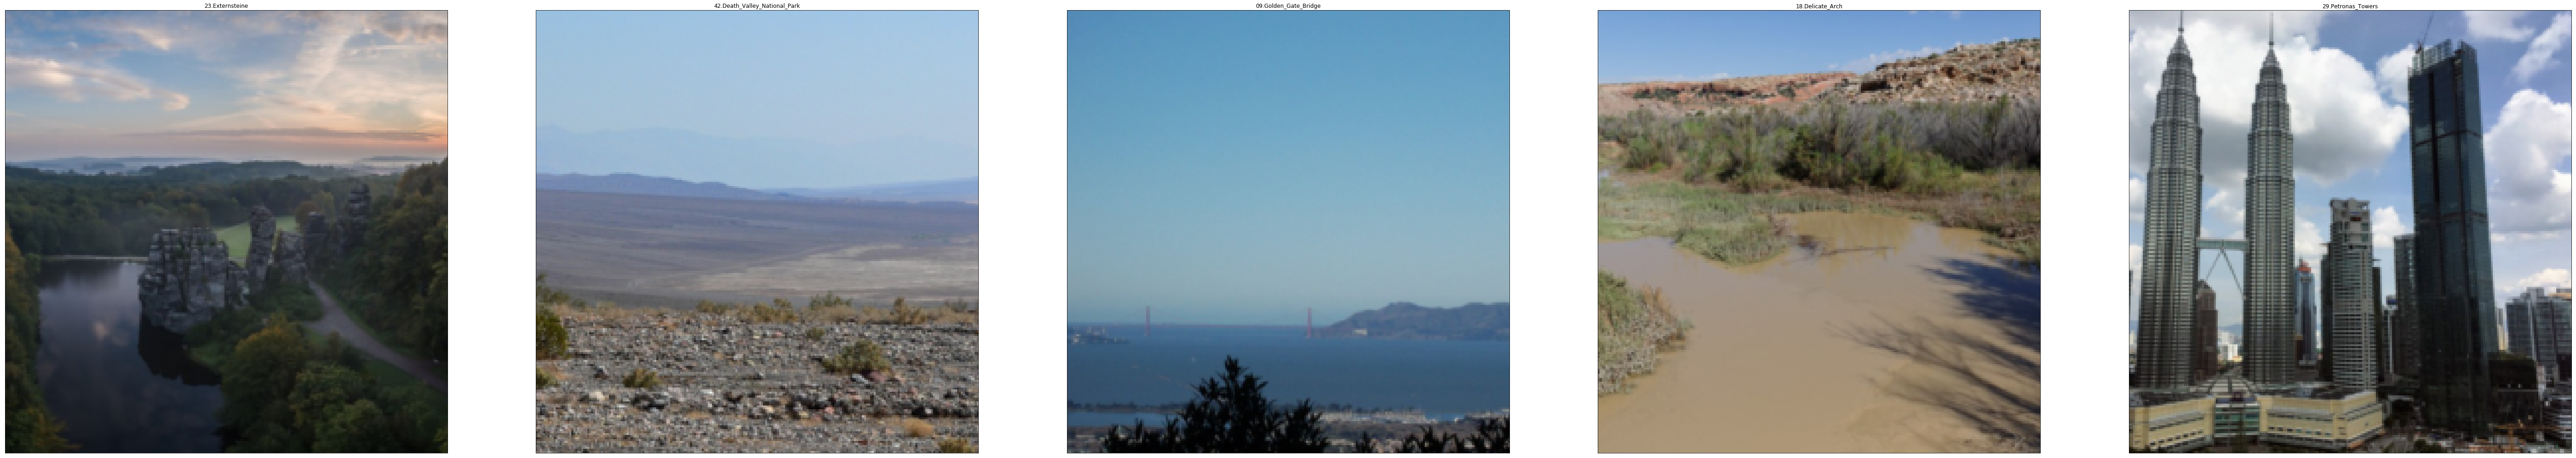

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
## TODO: visualize a batch of the train data loader

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

data_iter = iter(train_loader)
images, labels = data_iter.next()
images = images.numpy() 

fig = plt.figure(figsize=(100,20))
for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))

    ax.set_title(training_set.classes[labels[idx]])


### Initialize use_cuda variable

In [14]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

if not use_cuda:
    print('Training on CPU ...')
else:
    print('Training on GPU ...')


Training on GPU ...


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [15]:
import torch.nn as nn
import torch.optim as optim


## TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()
# It is useful when training a classification problem with C classes. (source: pytorch doc)

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    return optimizer 
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [16]:

# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        
        #maxpooling 
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(int(64 * (224/(2**3))**2), 256)
        self.fc2 = nn.Linear(256, len(training_set.classes))
        #dropout
        self.dropout = nn.Dropout(0.25)
        
         # Batch norm
        self.batch_norm2d = nn.BatchNorm2d(32)
        self.batch_norm1d = nn.BatchNorm1d(256)
        
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.batch_norm2d(x)

        x = self.pool(F.relu(self.conv3(x)))
        # flatten image
        x = x.view(-1, int(64 * (224/(2**3))**2))
        x = self.dropout(x)
        #1st hiddenlayer
        x = F.relu(self.fc1(x))
        
        x = self.batch_norm1d(x)

        #dropout layer
        x = self.dropout(x)
        #2nd hidden layer
        x = self.fc2(x)
        


        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [17]:
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=50, bias=True)
  (dropout): Dropout(p=0.25)
  (batch_norm2d): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm1d): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__   I applied similar method in the course. created CNN layer, maxpooling, linear layers and then dropout, batchnorm. I chose the ReLu activation function, generally works well in my works. 

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [18]:
import torch.nn.functional as F
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            
            loss = criterion(output, target)

            loss.backward()
            
            optimizer.step()
            
            train_loss += ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                try:
                    data, target = data.cuda(), target.cuda()
                except:
                    pass

            ## TODO: update average validation loss 

            output = model(data)
       
            loss = criterion(output, target)
         
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))#

   
        
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                                    valid_loss_min,
                                    valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss

    model.load_state_dict(torch.load(save_path))     
        
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [34]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    classname = m.__class__.__name__
  
    if classname.find('Conv2d') != -1:
        n = m.kernel_size[0] * m.kernel_size[1] * m.in_channels
        y = 1.0/np.sqrt(n)
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)
    if classname.find('Linear') != -1:
  
        n = m.in_features
        y = 1.0/np.sqrt(n)  #sigmoid formula
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)    
    

#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
model_scratch = train(10, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 3.671934 	Validation Loss: 3.550941
Validation loss decreased (inf --> 3.550941).  Saving model ...
Epoch: 2 	Training Loss: 3.373346 	Validation Loss: 3.377740
Validation loss decreased (3.550941 --> 3.377740).  Saving model ...
Epoch: 3 	Training Loss: 3.205837 	Validation Loss: 3.302456
Validation loss decreased (3.377740 --> 3.302456).  Saving model ...
Epoch: 4 	Training Loss: 3.060959 	Validation Loss: 3.244085
Validation loss decreased (3.302456 --> 3.244085).  Saving model ...
Epoch: 5 	Training Loss: 2.948855 	Validation Loss: 3.373688
Epoch: 6 	Training Loss: 2.859399 	Validation Loss: 5.649497
Epoch: 7 	Training Loss: 2.752446 	Validation Loss: 3.560331
Epoch: 8 	Training Loss: 2.668900 	Validation Loss: 3.229769
Validation loss decreased (3.244085 --> 3.229769).  Saving model ...
Epoch: 9 	Training Loss: 2.563044 	Validation Loss: 2.989314
Validation loss decreased (3.229769 --> 2.989314).  Saving model ...
Epoch: 10 	Training Loss: 2.477711 	Valida

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [36]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 15

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.682493 	Validation Loss: 3.576802
Validation loss decreased (inf --> 3.576802).  Saving model ...
Epoch: 2 	Training Loss: 3.429967 	Validation Loss: 3.607913
Epoch: 3 	Training Loss: 3.285415 	Validation Loss: 3.344423
Validation loss decreased (3.576802 --> 3.344423).  Saving model ...
Epoch: 4 	Training Loss: 3.156924 	Validation Loss: 3.467064
Epoch: 5 	Training Loss: 3.037125 	Validation Loss: 3.469004
Epoch: 6 	Training Loss: 2.934850 	Validation Loss: 3.319099
Validation loss decreased (3.344423 --> 3.319099).  Saving model ...
Epoch: 7 	Training Loss: 2.844615 	Validation Loss: 3.092671
Validation loss decreased (3.319099 --> 3.092671).  Saving model ...
Epoch: 8 	Training Loss: 2.737086 	Validation Loss: 3.790935
Epoch: 9 	Training Loss: 2.629515 	Validation Loss: 3.054815
Validation loss decreased (3.092671 --> 3.054815).  Saving model ...
Epoch: 10 	Training Loss: 2.538502 	Validation Loss: 3.338674
Epoch: 11 	Training Loss: 2.436513 	Validation Lo

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
            
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))


In [38]:
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.982456


Test Accuracy: 26% (326/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [20]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

from torch.utils.data.sampler import SubsetRandomSampler

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
data_dir = '/data/landmark_images/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')


training_set = datasets.ImageFolder(train_dir)
testing_set = datasets.ImageFolder(test_dir)
# print out some data stats
print('Num training images: ', len(training_set))
print('Num test images: ', len(testing_set))
batch_size = 16
num_workers=0
valid_size= 0.30

len_train = len(training_set)
index = list(range(len_train))
np.random.shuffle(index)
split = int(np.floor(valid_size * len_train))
train_set, valid_set = index[split:], index[:split]

train_sampler = SubsetRandomSampler(train_set)
valid_sampler = SubsetRandomSampler(valid_set)

#train, validation and test set are created. 

train_loader = torch.utils.data.DataLoader(training_set, batch_size=batch_size, 
                                           sampler= train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(training_set, batch_size=batch_size, 
                                           sampler =valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(testing_set, batch_size=batch_size, 
                                            num_workers=num_workers)

loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}
#transforms

transform = transforms.Compose([transforms.Resize(256),
                                     transforms.RandomHorizontalFlip(),#This is data augmentation.
                                      transforms.RandomCrop(256),
                                     transforms.ToTensor()])



train_loader.dataset.transform =transform
valid_loader.dataset.transform = transform 
test_loader.dataset.transform = transform 




Num training images:  4996
Num test images:  1250


In [21]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [88]:
## TODO: select loss function

# criterion_transfer = nn.CrossEntropyLoss()


# def get_optimizer_transfer(model):
#     ## TODO: select and return optimizer
#     optimizer = optim.SGD(model.parameters(), lr=0.1)
#     return optimizer

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [22]:
len(training_set.classes)

50

In [51]:
device = torch.device("cuda")
num_ftrs = model_transfer.fc.in_features
num_ftrs

512

In [23]:
# TODO: Specify model architecture
# from torch.optim import lr_scheduler

model_transfer = torchvision.models.resnet18(pretrained=True)
for param in model_transfer.parameters():
    param.requires_grad = False



In [24]:
model_transfer.fc = nn.Linear(2048, 50)
criterion_transfer = nn.CrossEntropyLoss()
optimizer_conv = optim.SGD(model_transfer.fc.parameters(), lr=0.01, momentum=0.9)
#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [76]:
# !pip install https://download.pytorch.org/whl/cu80/torch-1.0.0-cp36-cp36m-linux_x86_64.whl

    100% |████████████████████████████████| 532.5MB 86kB/s  eta 0:00:01  7% |██▍                             | 40.4MB 37.3MB/s eta 0:00:14    17% |█████▌                          | 91.7MB 36.0MB/s eta 0:00:13    20% |██████▌                         | 107.6MB 31.8MB/s eta 0:00:14    64% |████████████████████▌           | 341.4MB 49.5MB/s eta 0:00:04    65% |█████████████████████           | 348.4MB 2.0MB/s eta 0:01:34    86% |███████████████████████████▊    | 461.1MB 52.7MB/s eta 0:00:02    86% |███████████████████████████▉    | 462.7MB 23.2MB/s eta 0:00:04
  Found existing installation: torch 0.4.0
    Uninstalling torch-0.4.0:
      Successfully uninstalled torch-0.4.0


In [25]:
# Parameters of newly constructed modules have requires_grad=True by default
# num_ftrs = model_transfer.fc.in_features

# model_transfer = model_transfer.to(device)



# Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    try : 
        model_transfer = model_transfer.cuda()
    except:
        pass

In [26]:
model_transfer

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  I firstly wanted to use VGG16 but this time I want to try ResNet. Because ResNet could give better performance and is faster than VGG16. I checked the comparison of accuracy both ResNet and VGG16. 

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [19]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'
epochs=7
# model_transfer = train(epochs, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), 
#                       criterion_transfer, use_cuda, 'model_transfer.pt')
model_transfer = train(epochs, loaders_transfer, model_transfer, optimizer_conv, 
                      criterion_transfer, use_cuda, 'model_transfer.pt')
#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 5.528310 	Validation Loss: 5.691705
Validation loss decreased (inf --> 5.691705).  Saving model ...
Epoch: 2 	Training Loss: 3.812178 	Validation Loss: 4.053155
Validation loss decreased (5.691705 --> 4.053155).  Saving model ...
Epoch: 3 	Training Loss: 3.398564 	Validation Loss: 4.543441
Epoch: 4 	Training Loss: 3.036029 	Validation Loss: 5.153362
Epoch: 5 	Training Loss: 2.654465 	Validation Loss: 4.423667
Epoch: 6 	Training Loss: 2.356293 	Validation Loss: 4.289691
Epoch: 7 	Training Loss: 2.335806 	Validation Loss: 4.177792


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [22]:
# model_transfer.load_state_dict(torch.load('model_transfer.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 3.810199


Test Accuracy: 62% (787/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

This was also working but now it is not... 

In [36]:
# device = torch.device("cuda")
# model_transfer.load_state_dict(torch.load('model_transfer.pt'))
# model.to(device)

In [27]:
names=training_set.classes
for  i,name in enumerate(names):
    names[i]=name[3:]

In [29]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

RuntimeError: Error(s) in loading state_dict for ResNet:
	Unexpected key(s) in state_dict: "bn1.num_batches_tracked", "layer1.0.bn1.num_batches_tracked", "layer1.0.bn2.num_batches_tracked", "layer1.1.bn1.num_batches_tracked", "layer1.1.bn2.num_batches_tracked", "layer2.0.bn1.num_batches_tracked", "layer2.0.bn2.num_batches_tracked", "layer2.0.downsample.1.num_batches_tracked", "layer2.1.bn1.num_batches_tracked", "layer2.1.bn2.num_batches_tracked", "layer3.0.bn1.num_batches_tracked", "layer3.0.bn2.num_batches_tracked", "layer3.0.downsample.1.num_batches_tracked", "layer3.1.bn1.num_batches_tracked", "layer3.1.bn2.num_batches_tracked", "layer4.0.bn1.num_batches_tracked", "layer4.0.bn2.num_batches_tracked", "layer4.0.downsample.1.num_batches_tracked", "layer4.1.bn1.num_batches_tracked", "layer4.1.bn2.num_batches_tracked". 

In [30]:
import cv2
from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)



def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    model_transfer.eval()
    # forward pass
    img = Image.open(img_path).convert('RGB')
    image = transform(img)[:3,:,:].unsqueeze(0)
    output = model_transfer(image.cuda())
    return (np.array(sorted(zip(output[0].cpu().detach().numpy(), names), reverse=True)[:k])[:,1])



# test on a sample image
predict_landmarks('images/test/24.Soreq_Cave/18dbbad48a83a742.jpg', 5)

array(['Soreq_Cave', 'Matterhorn', 'Grand_Canyon',
       'Death_Valley_National_Park', 'Stonehenge'], 
      dtype='<U32')

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

Is this is of the

Forth_Bridge,Golden_Gate_Bridge,Brooklyn_Bridge 

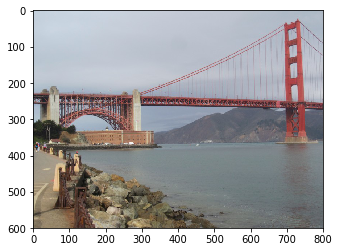

In [31]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    img = Image.open(img_path).convert('RGB')
    image = transform(img)[:3,:,:].unsqueeze(0)
    plt.imshow(img)
    print("Is this is of the\n")
    print(*predicted_landmarks, sep = ",",end=" ")

#test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

I tried many times, firstly I took just 2 percent accuracy..I solved this project in 5 days because of one mistake (in train transform part). Then without batchnorm I got 57 ..But now it is 62. It is not bad, If I change my CNN arch I think it will be better. 

1. I can increase the epochs (30-40.but not too much)
2. ...increase the conv layer not three maybe 6 or 7. 
3. ...increase size 224, and can add more transforming line (flipping,cropping part).  

In [11]:
training_set.classes

['00.Haleakala_National_Park',
 '01.Mount_Rainier_National_Park',
 '02.Ljubljana_Castle',
 '03.Dead_Sea',
 '04.Wroclaws_Dwarves',
 '05.London_Olympic_Stadium',
 '06.Niagara_Falls',
 '07.Stonehenge',
 '08.Grand_Canyon',
 '09.Golden_Gate_Bridge',
 '10.Edinburgh_Castle',
 '11.Mount_Rushmore_National_Memorial',
 '12.Kantanagar_Temple',
 '13.Yellowstone_National_Park',
 '14.Terminal_Tower',
 '15.Central_Park',
 '16.Eiffel_Tower',
 '17.Changdeokgung',
 '18.Delicate_Arch',
 '19.Vienna_City_Hall',
 '20.Matterhorn',
 '21.Taj_Mahal',
 '22.Moscow_Raceway',
 '23.Externsteine',
 '24.Soreq_Cave',
 '25.Banff_National_Park',
 '26.Pont_du_Gard',
 '27.Seattle_Japanese_Garden',
 '28.Sydney_Harbour_Bridge',
 '29.Petronas_Towers',
 '30.Brooklyn_Bridge',
 '31.Washington_Monument',
 '32.Hanging_Temple',
 '33.Sydney_Opera_House',
 '34.Great_Barrier_Reef',
 '35.Monumento_a_la_Revolucion',
 '36.Badlands_National_Park',
 '37.Atomium',
 '38.Forth_Bridge',
 '39.Gateway_of_India',
 '40.Stockholm_City_Hall',
 '41.Ma

Is this is of the

Prague_Astronomical_Clock,Petronas_Towers,Ljubljana_Castle 

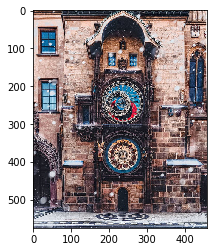

In [33]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.

suggest_locations('images/prag.jpg')

Is this is of the

Great_Wall_of_China,Pont_du_Gard,Petronas_Towers 

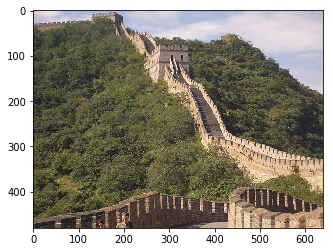

In [34]:
suggest_locations('images/china.jpg')

Is this is of the

Washington_Monument,Atomium,Death_Valley_National_Park 

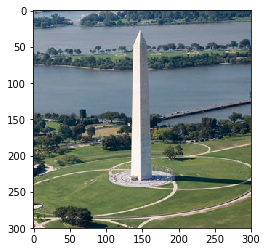

In [35]:
suggest_locations('images/Aerial.jpg')